# Librerías a utilizar

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib        as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Análisis de componente principales en el conjunto de datos Labelled Faces in the Wild

Considera el conjunto de datos Labelled Faces in the Wild (LFW) que consiste en fotografías de rostros recolectados de internet y contenido en *sklearn*. Algunos rostros identificados, tienen varuas fotos incluídas en el dataset. Vamos a considerar solo aquellas personas que tienen al menos 70 fotografías de su rostro, también, vamos a considerar el tamaño original de la imagen $(125 \times 94)$.

In [1]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)

Se explora el nombre de las personas incluidas en el conjunto de datos.

In [3]:
for name in lfw_people.target_names:
	print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [5]:
np.max(lfw_people.target)

6

Se crea un data frame con el target asignado a cada persona, posteriormente se obtiene el total de fotografías por cada una de ellas contenidas en el conjunto de datos.

In [4]:
target = pd.DataFrame(lfw_people.target)

In [5]:
target[0].value_counts()

3    530
1    236
6    144
2    121
4    109
0     77
5     71
Name: 0, dtype: int64

Se imprime el nombre de la persona y el target que le corresponde.

In [6]:
for i in range(7):
  name = lfw_people.target_names[i]
  print(name, i)

Ariel Sharon 0
Colin Powell 1
Donald Rumsfeld 2
George W Bush 3
Gerhard Schroeder 4
Hugo Chavez 5
Tony Blair 6


Se guarda el tamaño de las imágenes, así como se muestra un ejemplo de las imágenes a utilizar.


In [7]:
n_fil, n_col = lfw_people.images[0].shape

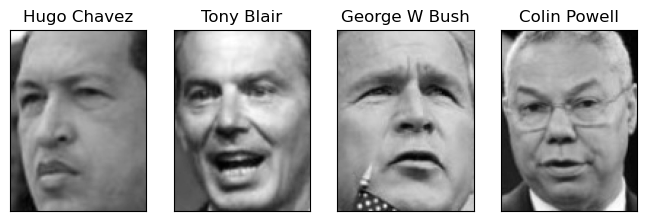

In [8]:
plt.figure()
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
for i in range(4):
    plt.subplot(1,4,i + 1)
    plt.imshow(lfw_people.images[i], cmap=plt.cm.gray)
    plt.title(lfw_people.target_names[lfw_people.target[i]], size=12)
    plt.xticks(())
    plt.yticks(())
plt.savefig('muestra.pdf',bbox_inches='tight')
plt.show()

In [9]:
lfw_people.target_names[lfw_people.target[0]]

'Hugo Chavez'

In [10]:
lfw_people.data[0].shape

(11750,)

In [11]:
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

In [12]:
lfw_people.images.shape

(1288, 125, 94)

In [13]:
X.shape

(1288, 11750)

In [14]:
y.shape

(1288,)

## Separamos un conjunto de entrenamiento (80 %) y prueba

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, target_names[y], test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
x_test_copy = X_test
x_train_copy = X_train

In [26]:
X_train.shape

(1030, 11750)

In [27]:
X_test.shape

(258, 11750)

Imágenes originales del conjunto de entrenamiento y el conjunto de prueba

In [17]:
imagenes_train = X_train.reshape((1030,n_fil,n_col))
imagenes_test = X_test.reshape(258,n_fil, n_col)

In [29]:
X_test.shape

(258, 11750)

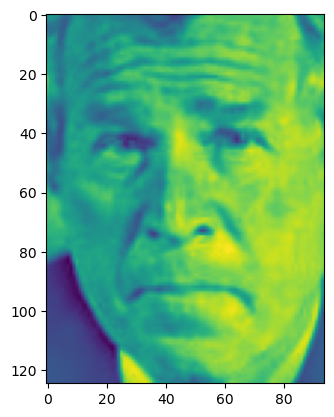

In [18]:
plt.imshow(X_test[0,:].reshape(n_fil,n_col))

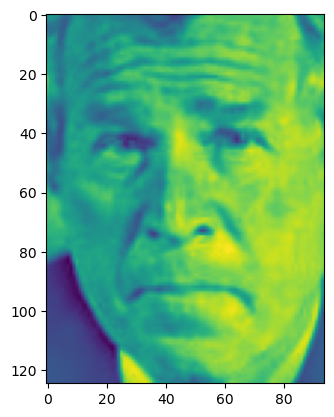

In [19]:
plt.imshow(imagenes_test[0])

## Aplicamos PCA y obtenemos las eigenfaces

In [20]:
n_componentes = 100
pca= PCA(n_componentes)
pca_faces = pca.fit_transform(X_train)

In [21]:
pca.components_.shape

(100, 11750)

In [22]:
pca.explained_variance_ratio_

array([0.25230142, 0.14199676, 0.06698489, 0.04783181, 0.03141673,
       0.02574615, 0.01912713, 0.01698156, 0.01597586, 0.01468192,
       0.0128536 , 0.01210895, 0.01103836, 0.00997325, 0.00937805,
       0.00889152, 0.00843203, 0.00743517, 0.00660373, 0.00616101,
       0.00599928, 0.00547155, 0.0051495 , 0.00485148, 0.00479319,
       0.00445921, 0.00440387, 0.00403925, 0.00391529, 0.00360653,
       0.00355573, 0.00346946, 0.00331101, 0.00317723, 0.00309248,
       0.00307007, 0.00290374, 0.00283367, 0.00279116, 0.00271459,
       0.00264931, 0.00253825, 0.00246058, 0.00243279, 0.00232885,
       0.00228484, 0.0022578 , 0.00220542, 0.00215704, 0.00212284,
       0.00206204, 0.00204452, 0.00200168, 0.00199626, 0.00194122,
       0.00188322, 0.00186145, 0.00177087, 0.00175535, 0.00171174,
       0.00168138, 0.00165491, 0.00161384, 0.00157644, 0.00153275,
       0.00152856, 0.00150285, 0.00149247, 0.00144545, 0.00143594,
       0.00142269, 0.00139951, 0.00137623, 0.00136243, 0.00132

In [23]:
np.cumsum(pca.explained_variance_ratio_)[17]

0.7131552

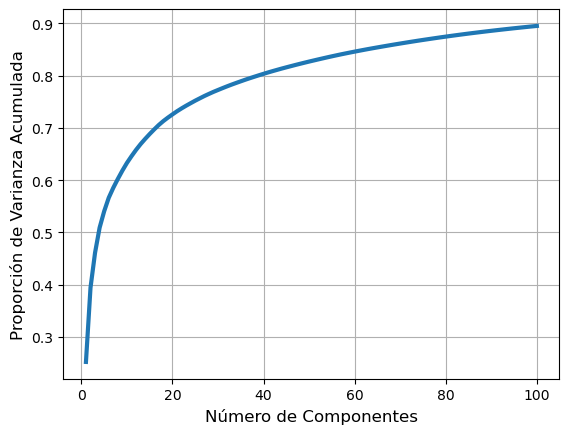

In [24]:
plt.figure()
#Graficamos el ratio de la variabilidad respecto al número de componentes
plt.plot(range(1,101),np.cumsum(pca.explained_variance_ratio_), lw=3)
plt.xlabel('Número de Componentes',  fontsize=12)
plt.ylabel('Proporción de Varianza Acumulada',  fontsize=12)
plt.grid()
plt.savefig("variance.pdf", bbox_inches="tight")
plt.show();

In [25]:
eigenfaces = pca.components_.reshape((n_componentes,n_fil,n_col))

In [26]:
pca_faces_df = pd.DataFrame(
    data=pca.components_[0:12],
    index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
    )
pca_faces_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11740,11741,11742,11743,11744,11745,11746,11747,11748,11749
PC1,-0.002560,-0.002712,-0.002863,-0.002906,-0.003062,-0.003347,-0.003727,-0.004175,-0.004588,-0.004886,...,-0.002629,-0.002426,-0.002301,-0.002165,-0.002171,-0.002141,-0.002090,-0.002079,-0.001954,-0.001861
PC2,0.007115,0.007014,0.006772,0.006599,0.006419,0.006557,0.006988,0.007589,0.008166,0.008694,...,-0.006489,-0.006142,-0.005854,-0.005515,-0.005322,-0.005387,-0.005505,-0.005678,-0.005773,-0.005703
PC3,-0.010718,-0.011262,-0.011577,-0.011853,-0.012111,-0.012357,-0.012680,-0.012941,-0.013041,-0.013389,...,-0.000927,-0.001194,-0.001345,-0.001453,-0.001387,-0.001239,-0.001159,-0.001035,-0.000860,-0.000460
PC4,0.011590,0.011187,0.010841,0.010822,0.011002,0.011048,0.010908,0.010422,0.010306,0.010338,...,0.010036,0.010005,0.009779,0.009408,0.008867,0.008180,0.007601,0.007364,0.007577,0.007979
PC5,0.004072,0.003457,0.003016,0.002909,0.002998,0.003181,0.003648,0.004127,0.004292,0.003937,...,-0.020600,-0.021161,-0.021539,-0.022252,-0.022829,-0.023049,-0.022693,-0.021748,-0.020436,-0.019211


In [42]:
eigenfaces.shape

(100, 125, 94)

In [112]:
lfw_people.target.shape

(1288,)

In [27]:
pca_faces[1:12,0]

array([-50.140144 ,   4.7009473, -21.45082  , -31.625994 , -19.312143 ,
        10.866937 , -75.33995  ,   5.079987 ,  62.328075 ,  64.07663  ,
       -10.255006 ], dtype=float32)

In [28]:
pca_df = pd.DataFrame(
    data=pca_faces[:,0:12], 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10', 'PC11', 'PC12']
    )
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,79.997215,17.549976,-4.725720,-3.361092,-12.849926,31.086678,7.829787,7.134338,-3.229107,-0.369197,-1.637080,7.474783
1,-50.140144,-23.143169,-28.861279,9.482520,-19.476143,33.585938,-9.136649,-5.924342,-6.864285,-23.276146,-14.549156,-4.521299
2,4.700947,-19.150475,3.844934,-3.316935,6.892103,20.532587,-16.374182,-4.339828,16.112150,13.587362,18.451588,-20.657839
3,-21.450821,-2.416292,-19.266987,30.813425,-24.522257,16.730135,-26.308317,-34.209118,3.288013,-4.457035,-6.142647,-6.802459
4,-31.625994,5.349006,13.564020,20.984253,-7.145018,-17.492428,18.053909,-1.840621,2.665117,-14.068377,3.715404,-3.319113


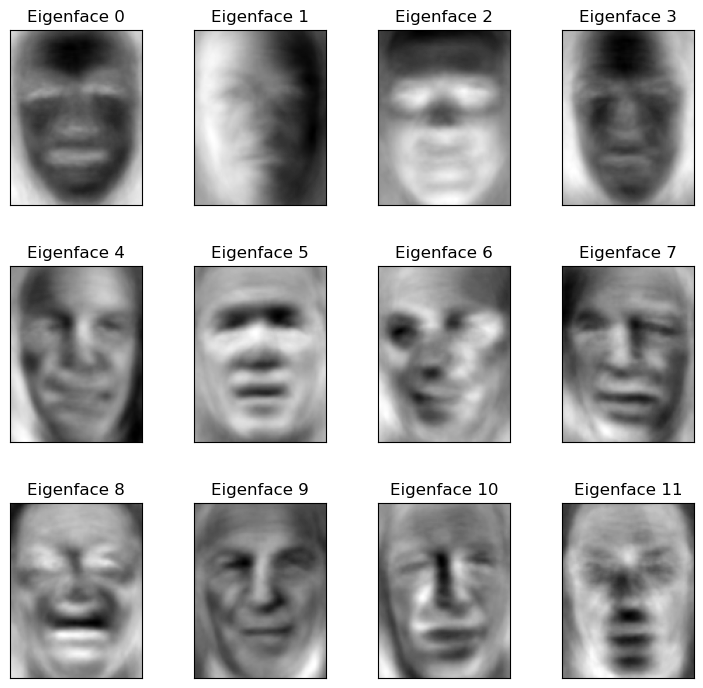

In [29]:
titles = ['Eigenface 0', 'Eigenface 1', 'Eigenface 2', 'Eigenface 3', 'Eigenface 4', 'Eigenface 5',
         'Eigenface 6', 'Eigenface 7', 'Eigenface 8', 'Eigenface 9', 'Eigenface 10', 'Eigenface 11']

plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
for i in range(12):
    plt.subplot(3,4,i + 1)
    plt.imshow(eigenfaces[i], cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('eigenfaces.pdf',bbox_inches='tight')
plt.show()

In [66]:
fig = px.scatter(pca_df, x='PC1', y='PC2', color=names_train)
fig.show()


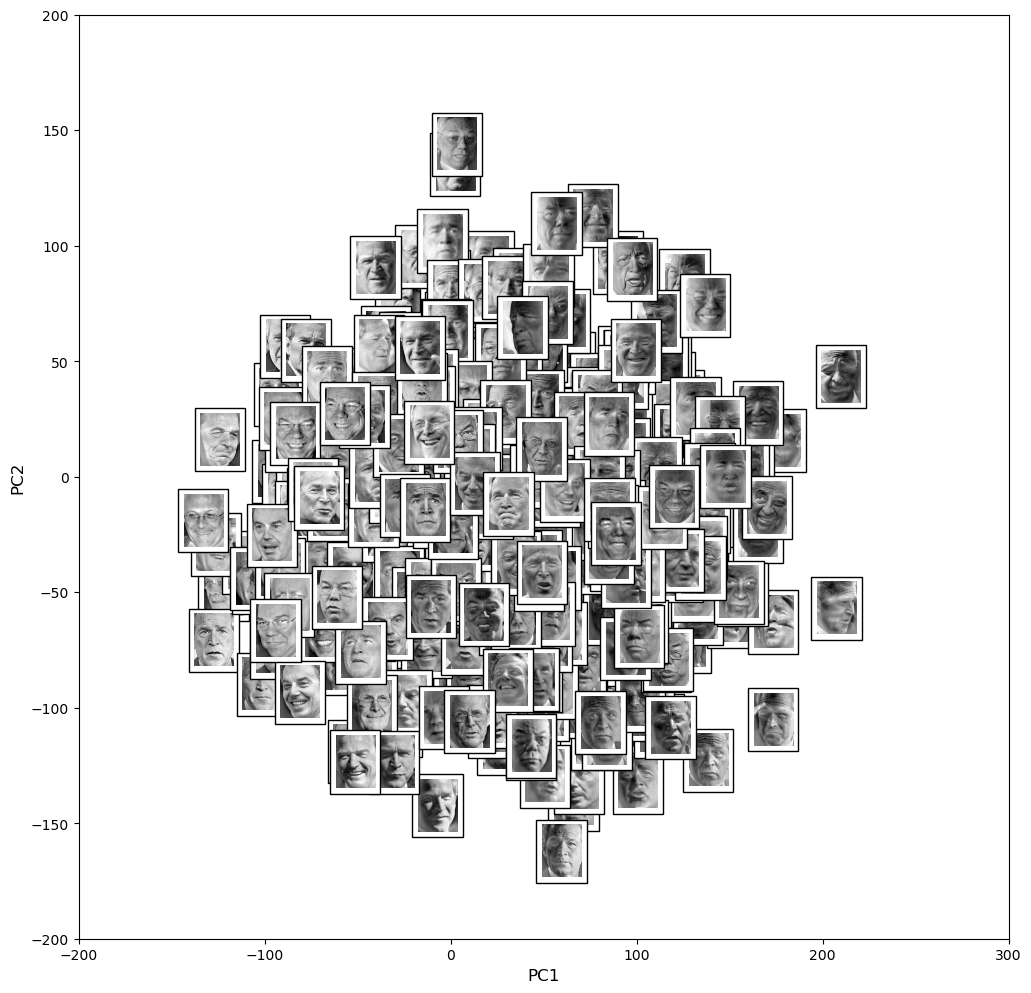

In [31]:
#loadings = pca.components_
fig, ax = plt.subplots()
#plt.figure(figsize=(40,40))

for x0, y0, path in zip(pca_df['PC1'], pca_df['PC2'], imagenes_train ):
  imagebox = OffsetImage(path, zoom=0.3, cmap=plt.cm.gray)
  ab = AnnotationBbox(imagebox, (x0, y0), xybox=(30., -30.),
  xycoords='data',
  boxcoords='offset points')                                  
  ax.add_artist(ab)
ax.set_xlim(-200, 300)
ax.set_ylim(-200, 200)
plt.xlabel('PC1',  fontsize=12)
plt.ylabel('PC2',  fontsize=12)
fig.set_size_inches(12, 12)
#plt.savefig('scatter_faces.pdf',bbox_inches='tight')
plt.show()

Proyecta los datos de prueba en los componentes principales. Verifica si se ``ubican`` en su ``individuo`` correspondiente al graficarlos en los primeros dos componentes principales.

In [32]:
X_test_trans = pca.transform(X_test)

In [33]:
X_test.shape

(258, 11750)

In [34]:
color_names_dict = {'Hugo Chavez':'seagreen', 
          'Tony Blair':'darkcyan',
          'George W Bush':'indianred',
          'Colin Powell':'darkorange', 
          'Ariel Sharon':'hotpink',
          'Donald Rumsfeld':'red',
          'Gerhard Schroeder':'blue'}

In [35]:
labels= names_train
all_colors = list(color_names_dict.values())
color_idx = [all_colors.index(color_names_dict[label]) for label in labels]

In [36]:
labels2= names_test
all_colors2 = list(color_names_dict.values())
color_idx2 = [all_colors.index(color_names_dict[label]) for label in labels2]

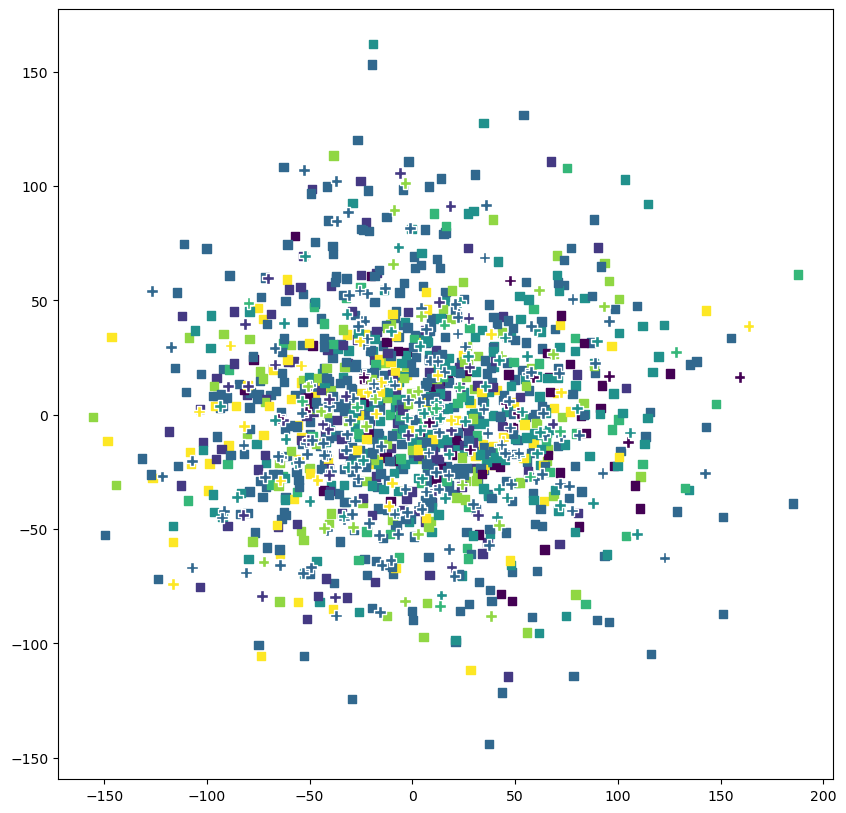

In [37]:
fig, ax = plt.subplots()

plt.scatter(pca_faces[:,0], pca_faces[:,1], marker = 's', c = color_idx)
plt.scatter(X_test_trans[:,0], X_test_trans[:,1], s=70, marker = 'P',c = color_idx2 , edgecolor='white')
fig.set_size_inches(10, 10)
plt.show()

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=pca_faces[:,0], y=pca_faces[:,1],
                    mode='markers',
                    name='Datos de entreamiendo',
                    marker_color = color_idx,
                    text = names_train,
                    marker = dict(symbol = 'square', size = 5)
                    ))
fig.add_trace(go.Scatter(x=X_test_trans[:,0], y=X_test_trans[:,1],
                    mode='markers',
                    name='Datos de prueba',
                    marker = dict(size = 10),
                    marker_color = color_idx2,
                    text = names_test))
fig.show()

## Vecino más cercano

In [39]:
def dist(x,y,p):
  d = sum(pow(abs(a-b),p) for a, b in zip(x, y) )
  return d**(1./p)

In [42]:
def iden_sujeto(x_train, x_test, p,names_train,names_test, n_sujeto):
  #Aplicamos PCA con p componentes
  n_componentes = p
  pca= PCA(n_componentes)
  pca_faces_p = pca.fit_transform(x_train)

  #Tomamos a algún sujeto y lo proyectamos
  sujeto = pca.transform(x_test[n_sujeto,:].reshape(1,-1))
  #Se recupera 
  sujeto_transform = pca.inverse_transform(sujeto)

  #Calculamos las distancias
  distancias = np.zeros(p)

  for i in range(p):
    dif = pca_faces_p[i,:]-sujeto[0]
    dist1 = np.sqrt(np.dot(dif.T, dif))
    distancias[i] = dist1
  
  #Distancia minima
  index = distancias.argmin()


  plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
  plt.subplot(1,3,1)
  plt.imshow(x_test[n_sujeto,:].reshape(n_fil,n_col), cmap=plt.cm.gray)
  plt.axis("off")
  plt.title('Original (test) '+'\n'+names_test[n_sujeto], size=12)
  plt.subplot(1,3,2)
  plt.imshow(sujeto_transform.reshape(n_fil,n_col), cmap=plt.cm.gray)
  plt.axis("off")
  plt.title('Proyección', size=12)
  plt.subplot(1,3,3)
  plt.imshow(x_train[index,:].reshape(n_fil,n_col), cmap=plt.cm.gray)
  plt.axis("off")
  plt.title('Más cercano (train) '+'\n'+ names_train[index], size=12)
  #plt.savefig('indv4_40.pdf',bbox_inches='tight')
  plt.show()

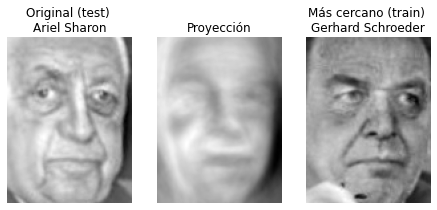

In [100]:
iden_sujeto(x_train_copy, x_test_copy, 18, names_train, names_test, 52)

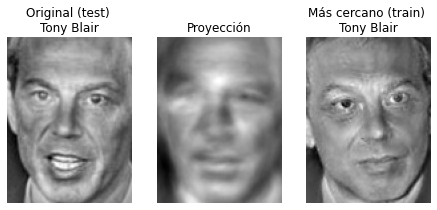

In [102]:
iden_sujeto(x_train_copy, x_test_copy, 40, names_train, names_test, 2)

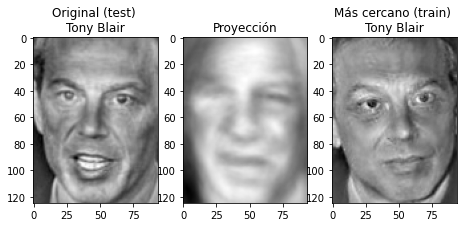

In [56]:
iden_sujeto(x_train_copy, x_test_copy, 18, names_train, names_test, 2)

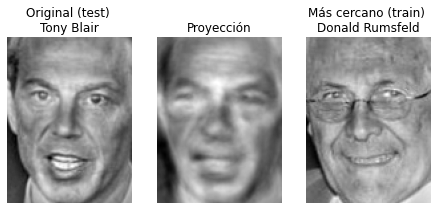

In [104]:
iden_sujeto(x_train_copy, x_test_copy, 100, names_train, names_test, 2)

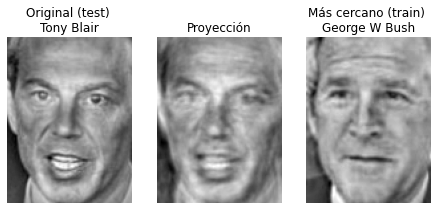

In [106]:
iden_sujeto(x_train_copy, x_test_copy, 400, names_train, names_test, 2)

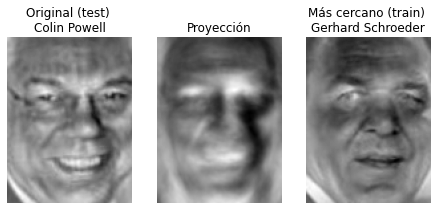

In [108]:
iden_sujeto(x_train_copy, x_test_copy, 40, names_train, names_test, 7)

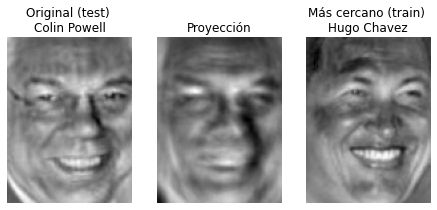

In [110]:
iden_sujeto(x_train_copy, x_test_copy, 100, names_train, names_test, 7)

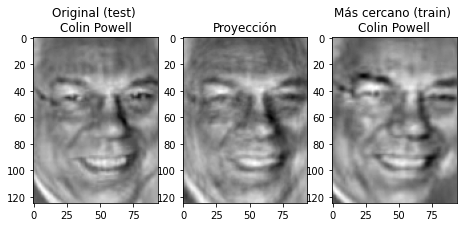

In [68]:
iden_sujeto(x_train_copy, x_test_copy, 400, names_train, names_test, 7)

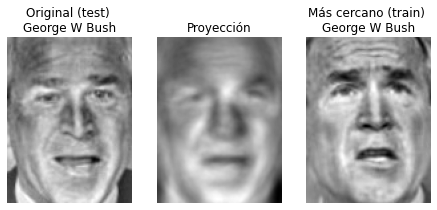

In [112]:
iden_sujeto(x_train_copy, x_test_copy, 40, names_train, names_test, 10)

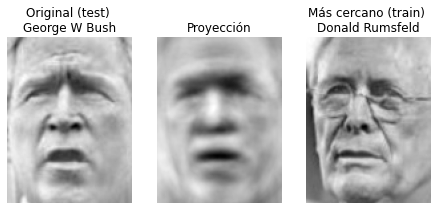

In [114]:
iden_sujeto(x_train_copy, x_test_copy, 40, names_train, names_test, 15)

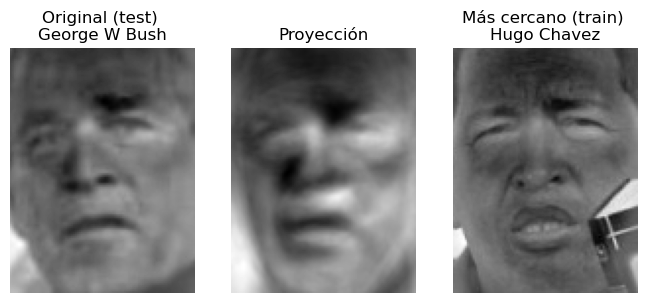

In [43]:
iden_sujeto(x_train_copy, x_test_copy, 40, names_train, names_test, 3)

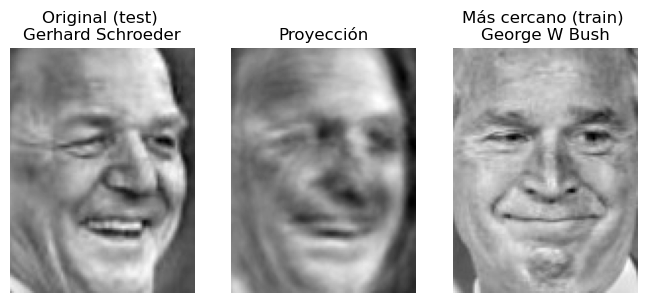

In [44]:
iden_sujeto(x_train_copy, x_test_copy, 100, names_train, names_test, 19)

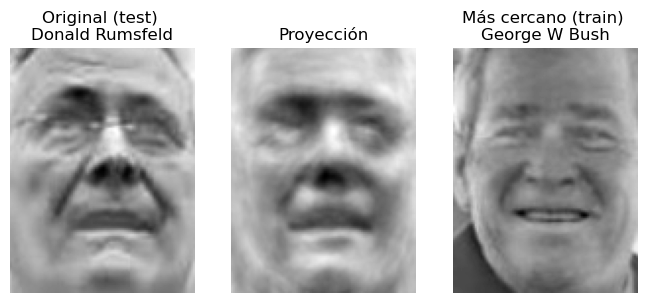

In [45]:
iden_sujeto(x_train_copy, x_test_copy, 100, names_train, names_test, 48)

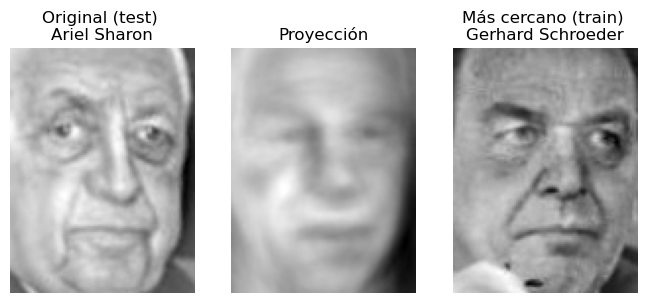

In [46]:
iden_sujeto(x_train_copy, x_test_copy, 10, names_train, names_test, 52)

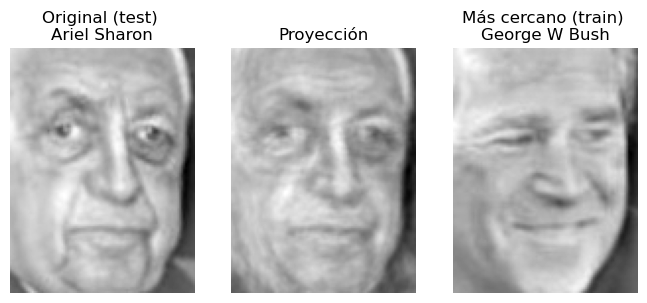

In [47]:
iden_sujeto(x_train_copy, x_test_copy, 400, names_train, names_test, 52)

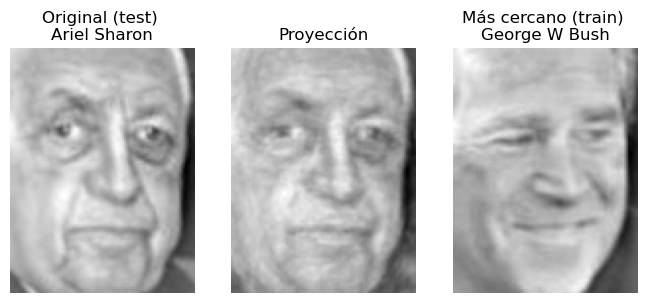

In [48]:
iden_sujeto(x_train_copy, x_test_copy, 700, names_train, names_test, 52)

In [49]:
sujeto = imagenes_test[0]
sujeto.shape

(125, 94)

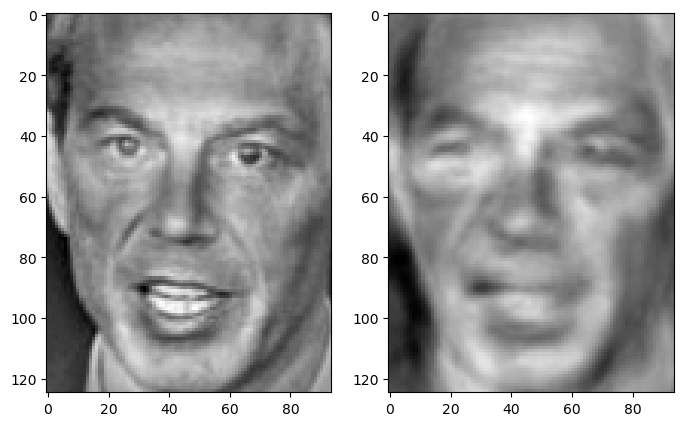

In [50]:
p = 100
n_componentes = p
pca= PCA(n_componentes)
pca_faces_p = pca.fit_transform(x_train_copy)


sujeto = pca.transform(x_test_copy[2,:].reshape(1,-1))
sujeto_transform = pca.inverse_transform(sujeto)


plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
plt.subplot(1,2,1)
plt.imshow(x_test_copy[2,:].reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(sujeto_transform.reshape(n_fil,n_col), cmap=plt.cm.gray)

plt.show()

In [51]:
distancias = np.zeros(p)

for i in range(p):
  dif = pca_faces_p[i,:]-sujeto[0]
  dist1 = np.sqrt(np.dot(dif.T, dif))
  distancias[i] = dist1


In [437]:
distancias

array([182.14179993,  55.42436218])

In [475]:
el_min = min(distancias)
index = distancias.argmin()

Text(0.5, 1.0, 'Donald Rumsfeld')

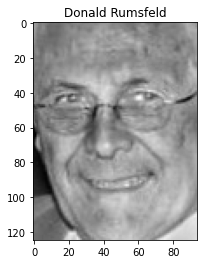

In [476]:
plt.imshow(x_train_copy[index,:].reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.title(names_train[y_train[index]], size=12)

In [427]:
pca_faces_p[0,:]

array([88.44746 , 16.999489], dtype=float32)

In [429]:
pca_faces_p[0,:]-sujeto[0]

array([161.08884,  85.00603], dtype=float32)

In [434]:
temp = pca_faces_p[0,:]-sujeto[0]
dist1 = np.sqrt(np.dot(temp.T, temp))
dist1

182.1418

In [432]:
dist(pca_faces_p,sujeto[0],2)

array([163.37389, 100.45918], dtype=float32)

In [417]:
pca_faces_p-sujeto

array([[161.08884   ,  85.00603   ],
       [ 31.86375   ,  45.349327  ],
       [ 85.55444   ,  48.564667  ],
       ...,
       [ 25.699696  ,  77.284     ],
       [ 48.37593   , 104.992355  ],
       [ -0.86987305,  34.820984  ]], dtype=float32)

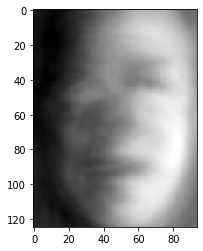

In [395]:
plt.imshow(sujeto_transform.reshape(n_fil,n_col), cmap=plt.cm.gray, interpolation='nearest')

## Sujeto externo


In [52]:
lfw_people2 = fetch_lfw_people(min_faces_per_person=40, resize=1)

In [53]:
for name in lfw_people2.target_names:
	print(name)

Ariel Sharon
Arnold Schwarzenegger
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Gloria Macapagal Arroyo
Hugo Chavez
Jacques Chirac
Jean Chretien
Jennifer Capriati
John Ashcroft
Junichiro Koizumi
Laura Bush
Lleyton Hewitt
Luiz Inacio Lula da Silva
Serena Williams
Tony Blair
Vladimir Putin


In [54]:
for i in range(19):
  name = lfw_people2.target_names[i]
  print(name, i)

Ariel Sharon 0
Arnold Schwarzenegger 1
Colin Powell 2
Donald Rumsfeld 3
George W Bush 4
Gerhard Schroeder 5
Gloria Macapagal Arroyo 6
Hugo Chavez 7
Jacques Chirac 8
Jean Chretien 9
Jennifer Capriati 10
John Ashcroft 11
Junichiro Koizumi 12
Laura Bush 13
Lleyton Hewitt 14
Luiz Inacio Lula da Silva 15
Serena Williams 16
Tony Blair 17
Vladimir Putin 18


In [55]:
lfw_people2.target[113]

10

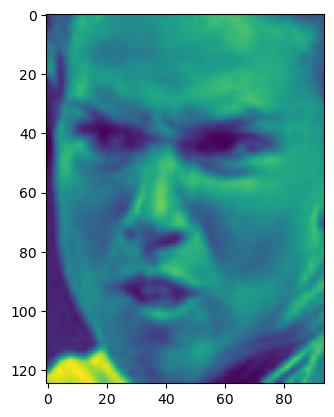

In [56]:
plt.imshow(lfw_people2.images[113])

In [57]:
jennifer = lfw_people2.data[113]

In [58]:
john = lfw_people.data[105]

In [59]:
arnold = lfw_people2.data[41]

In [60]:
serena = lfw_people2.data[5]

In [61]:
scaler = StandardScaler()
arnold_st = scaler.fit_transform(arnold.reshape(1,-1))

In [62]:
scaler = StandardScaler()
serena_st = scaler.fit_transform(serena.reshape(1,-1))

In [63]:
scaler = StandardScaler()
jennifer_st = scaler.fit_transform(jennifer.reshape(1,-1))

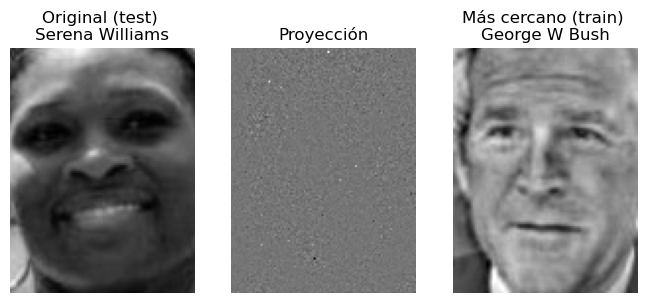

In [64]:
#Aplicamos PCA con p componentes
p=400
n_componentes = p
pca= PCA(n_componentes)
pca_faces_p = pca.fit_transform(x_train_copy)

  #Tomamos a algún sujeto y lo proyectamos
sujeto = pca.transform(serena_st.reshape(1,-1))
  #Se recupera 
sujeto_transform = pca.inverse_transform(sujeto)

  #Calculamos las distancias
distancias = np.zeros(p)

for i in range(p):
  dif = pca_faces_p[i,:]-sujeto[0]
  dist1 = np.sqrt(np.dot(dif.T, dif))
  distancias[i] = dist1
  
  #Distancia minima
index = distancias.argmin()


plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
plt.subplot(1,3,1)
plt.imshow(serena.reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Original (test) '+'\n'+'Serena Williams', size=12)
plt.subplot(1,3,2)
plt.imshow(sujeto_transform.reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Proyección', size=12)
plt.subplot(1,3,3)
plt.imshow(x_train_copy[index,:].reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Más cercano (train) '+'\n'+ names_train[index], size=12)
plt.savefig('serena400.pdf',bbox_inches='tight')
plt.show()

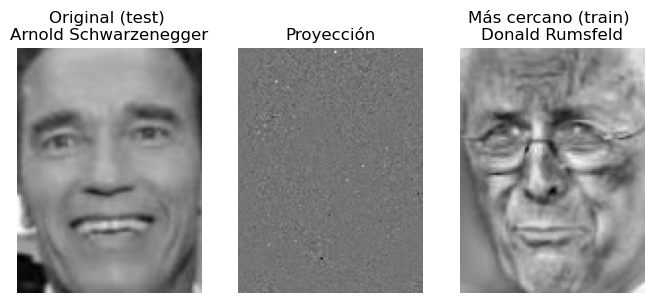

In [65]:
#Aplicamos PCA con p componentes
p=100
n_componentes = p
pca= PCA(n_componentes)
pca_faces_p = pca.fit_transform(x_train_copy)

  #Tomamos a algún sujeto y lo proyectamos
sujeto = pca.transform(arnold_st.reshape(1,-1))
  #Se recupera 
sujeto_transform = pca.inverse_transform(sujeto)

  #Calculamos las distancias
distancias = np.zeros(p)

for i in range(p):
  dif = pca_faces_p[i,:]-sujeto[0]
  dist1 = np.sqrt(np.dot(dif.T, dif))
  distancias[i] = dist1
  
  #Distancia minima
index = distancias.argmin()


plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
plt.subplot(1,3,1)
plt.imshow(arnold.reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Original (test) '+'\n'+'Arnold Schwarzenegger', size=12)
plt.subplot(1,3,2)
plt.imshow(sujeto_transform.reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Proyección', size=12)
plt.subplot(1,3,3)
plt.imshow(x_train_copy[index,:].reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Más cercano (train) '+'\n'+ names_train[index], size=12)
#plt.savefig('arnold18.pdf',bbox_inches='tight')
plt.show()

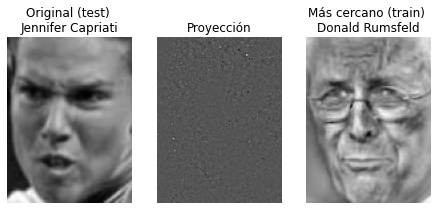

In [255]:
#Aplicamos PCA con p componentes
p=400
n_componentes = p
pca= PCA(n_componentes)
pca_faces_p = pca.fit_transform(x_train_copy)

  #Tomamos a algún sujeto y lo proyectamos
sujeto = pca.transform(jennifer_st.reshape(1,-1))
  #Se recupera 
sujeto_transform = pca.inverse_transform(sujeto)

  #Calculamos las distancias
distancias = np.zeros(p)

for i in range(p):
  dif = pca_faces_p[i,:]-sujeto[0]
  dist1 = np.sqrt(np.dot(dif.T, dif))
  distancias[i] = dist1
  
  #Distancia minima
index = distancias.argmin()


plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
plt.subplot(1,3,1)
plt.imshow(jennifer.reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Original (test) '+'\n'+'Jennifer Capriati', size=12)
plt.subplot(1,3,2)
plt.imshow(sujeto_transform.reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Proyección', size=12)
plt.subplot(1,3,3)
plt.imshow(x_train_copy[index,:].reshape(n_fil,n_col), cmap=plt.cm.gray)
plt.axis("off")
plt.title('Más cercano (train) '+'\n'+ names_train[index], size=12)
plt.savefig('jennifer400.pdf',bbox_inches='tight')
plt.show()

# Ejercicio 4

In [3]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)

In [4]:
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

In [5]:
X_t = X.T
y_t = y.T
target_names_t = target_names.T

In [6]:
n_fil, n_col = lfw_people.images[0].shape

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, target_names[y], test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_trans = X_train.T

In [10]:
n, p = X_train.shape

In [39]:
n_componentes = 8
pca_s= PCA(n_componentes)
pca_S = pca_s.fit(X_train)

In [40]:
n_componentes = 8
pca_k = PCA(n_componentes)
pca_K = pca_k.fit(X_trans)

In [41]:
pca_s_df = pd.DataFrame(
    data=pca_s.components_,
    index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']#, 'PC9', 'PC10', 'PC11', 'PC12']
    )
pca_s_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11740,11741,11742,11743,11744,11745,11746,11747,11748,11749
PC1,-0.002104,-0.002227,-0.002333,-0.002299,-0.002374,-0.002582,-0.002868,-0.003247,-0.003614,-0.003853,...,-0.001552,-0.001387,-0.001297,-0.001185,-0.001206,-0.001220,-0.001241,-0.001254,-0.001143,-0.001099
PC2,0.007002,0.006904,0.006675,0.006507,0.006338,0.006477,0.006922,0.007546,0.008156,0.008709,...,-0.006244,-0.005910,-0.005632,-0.005293,-0.005099,-0.005175,-0.005305,-0.005482,-0.005580,-0.005521
PC3,-0.010395,-0.010935,-0.011270,-0.011531,-0.011786,-0.012027,-0.012348,-0.012658,-0.012818,-0.013177,...,-0.000383,-0.000622,-0.000773,-0.000903,-0.000868,-0.000744,-0.000683,-0.000579,-0.000377,0.000034
PC4,0.011667,0.011327,0.011018,0.010993,0.011137,0.011205,0.011135,0.010741,0.010697,0.010810,...,0.009187,0.009156,0.008962,0.008612,0.008080,0.007416,0.006904,0.006702,0.006905,0.007304
PC5,0.003945,0.003383,0.002987,0.002884,0.002985,0.003177,0.003627,0.004099,0.004261,0.003926,...,-0.020117,-0.020646,-0.021014,-0.021692,-0.022273,-0.022545,-0.022281,-0.021428,-0.020178,-0.018986


In [42]:
pca_k_df = pd.DataFrame(
    data=pca_k.components_,
    index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']#, 'PC9', 'PC10', 'PC11', 'PC12']
    )
pca_k_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029
PC1,-0.016164,0.018603,0.014065,0.002460,-0.003278,-0.021728,0.010204,-0.031520,-0.042278,0.014247,...,0.066119,-0.020411,-0.001138,0.066394,0.031798,-0.024504,-0.012368,-0.005023,-0.026639,0.027711
PC2,-0.002398,0.031958,-0.006192,0.020935,-0.016528,0.010682,-0.036141,-0.009280,-0.006173,0.009548,...,-0.017024,0.059937,-0.024514,0.029535,0.008584,0.023307,0.041561,0.028993,0.031099,0.029484
PC3,0.021308,-0.005190,0.000050,0.022990,0.017827,0.033763,-0.013238,-0.006850,0.011419,0.003835,...,0.046143,0.017460,-0.038553,-0.038473,0.071911,-0.003538,0.020093,-0.012051,-0.010258,-0.008545
PC4,-0.022020,-0.030642,0.011497,-0.038732,-0.012728,-0.004034,-0.013691,0.052841,-0.003432,0.011244,...,-0.016958,0.018608,0.019678,0.065148,-0.009569,-0.014067,-0.068829,-0.015888,-0.022248,-0.045012
PC5,-0.037575,-0.064810,-0.028411,-0.047893,0.022134,-0.006776,-0.034903,0.002228,0.026631,0.041949,...,0.032355,-0.011901,-0.059931,0.011598,-0.029154,0.010867,0.019851,-0.053368,-0.042585,-0.067823


In [25]:
pca_k.components_.shape

(12, 1030)

In [43]:
eigenvalues_k = pca_k.explained_variance_ratio_
eigenvalues_k

array([0.18496655, 0.08677322, 0.08037964, 0.04078545, 0.0354501 ,
       0.02523581, 0.0225393 , 0.02074341], dtype=float32)

In [16]:
eigenvalues_k_sqrt = np.diag(eigenvalues_k**(-1/2) )

In [17]:
lambda_K = np.zeros((n_componentes, n_componentes))
for i in range(n_componentes):
  lambda_K[i,:] = eigenvalues_k_sqrt[i]

In [56]:
pca_k.components_.shape

(12, 1030)

In [181]:
pca_s.components_.shape

(12, 11750)

In [44]:
S_k = X_trans @ (lambda_K @ -pca_k.components_).T

ValueError: ignored

In [45]:
S_k = X_trans @ (-pca_k.components_).T

In [26]:
S_k.shape

(11750, 12)

In [19]:
pca_s.components_.shape

(12, 11750)

In [46]:
eigenfaces_s = pca_s.components_.reshape((n_componentes,n_fil,n_col))

In [47]:
eigenfaces_r_k = S_k.T.reshape((n_componentes,n_fil,n_col))

In [21]:
pca_s.components_.shape

(12, 11750)

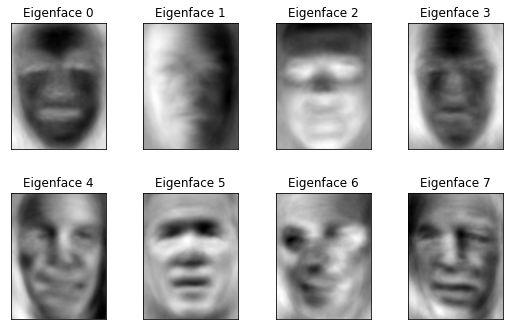

In [48]:
titles = ['Eigenface 0', 'Eigenface 1', 'Eigenface 2', 'Eigenface 3', 'Eigenface 4', 'Eigenface 5',
         'Eigenface 6', 'Eigenface 7', 'Eigenface 8', 'Eigenface 9', 'Eigenface 10', 'Eigenface 11']

plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
for i in range(8):
    plt.subplot(3,4,i + 1)
    plt.imshow(eigenfaces_s[i], cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
plt.savefig('eigenfaces_S.pdf',bbox_inches='tight')
plt.show()

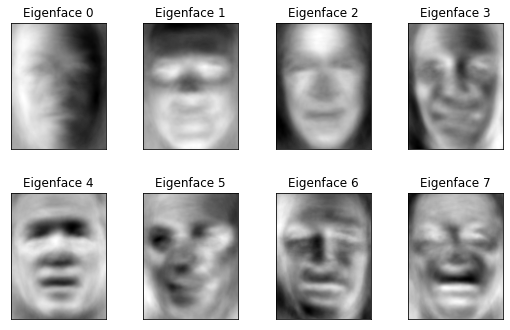

In [49]:
titles = ['Eigenface 0', 'Eigenface 1', 'Eigenface 2', 'Eigenface 3', 'Eigenface 4', 'Eigenface 5',
         'Eigenface 6', 'Eigenface 7', 'Eigenface 8', 'Eigenface 9', 'Eigenface 10', 'Eigenface 11']

plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
for i in range(8):
    plt.subplot(3,4,i + 1)
    plt.imshow(eigenfaces_r_k[i], cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
plt.savefig('eigenfaces_K.pdf',bbox_inches='tight')
plt.show()